 # Project 2: Phân tích dữ liệu

<p>Trang Soundcloud là một trang web cho phép người dùng upload và chia sẻ các bài
hát. Chúng ta sẽ phân tích dữ liệu về các nghệ sĩ, ban nhạc, podcast và người sáng
tác âm nhạc trên trang Soundcloud thông qua đồ án này</p>


## Cài đặt môi trường
### Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import warnings
import copy

# Phần 1: Phân tích dữ liệu của user:
### Thông tin cơ bản về dữ liệu 
   * **id**:              Mã định danh của người dùng
   * **avartar_url**:     Đường dẫn đến avatar của người dùng
   * **followers_count**: Số lượng người theo dõi người dùng
   * **full_name**:       Họ tên đầy đủ của người dùng
   * **last_modified**:   Lần chỉnh sửa cuối cùng về profile của người dùng
   * **permalink_url**:   Đường dẫn trực tiếp đến người dùng trên soundcloud
   * **username**:        Tên người dùng trên soundcloud
   * **verified**:        Trạng thái xác nhận của soundcloud đối với người dùng
   * **city**:            Thành phố của người dùng
   * **country_code**:    Mã quốc gia của người dùng
   * **badges**:          Danh hiệu người dùng đã đạt được
   
## Nội dung thực hiện 
###     1. Tiền xử lí dữ liệu 
   * Thay thế "None" bằng Nan
   * Xóa column "first_name", "last_name"
   * Xóa các bộ dữ liệu có tỉ lệ missing lớn hơn 25%
   
### 2. Khám phá dữ liệu 
   * Dữ liệu có kiểu là số
   * Dữ liệu có kiểu không phải là số 
 
### 3. Câu hỏi 
   * Phân bố user ở các quốc gia ?
   * Quốc gia nào được yêu thích nhất ?
   * Tương quan giữa số lượng followers và trạng thái xác nhận tài khoản 

## 1.1 Tiền xử lí dữ liệu

In [ ]:
data = pd.read_csv("user.csv")
data.head()

,id,avatar_url,first_name,followers_count,full_name,last_modified,last_name,permalink_url,username,verified,city,country_code,badges
0,8,https://i1.sndcdn.com/avatars-000208970259-vng...,Alexander,180223,Alexander Ljung,2020-10-20T14:38:52Z,Ljung,https://soundcloud.com/alex,🔥𝔞𝔩𝔢𝔵 🔥,False,Berlin/NYC,DE,pro_unlimited
1,183,https://i1.sndcdn.com/avatars-000012778523-59q...,Eric,133715,Eric Wahlforss,2020-12-16T21:40:33Z,Wahlforss,https://soundcloud.com/forss,Forss,True,Berlin,DE,verified
2,1691,https://i1.sndcdn.com/avatars-000000018772-c5d...,Ark,265,Ark Kozuki,2020-08-17T12:33:59Z,Kozuki,https://soundcloud.com/ark,ark,False,Tokyo,JP,None
3,2157,https://i1.sndcdn.com/avatars-N3HNyXVCJnJ8YiLQ...,Kim,1501,Kim,2021-08-17T10:55:32Z,None,https://soundcloud.com/kimik,Kimik,False,Tampere,FI,pro_unlimited
4,1719,https://i1.sndcdn.com/avatars-000000012820-990...,None,877,None,2017-09-07T21:15:46Z,None,https://soundcloud.com/headphonescience,Headphone Science,False,None,None,None


In [ ]:
#Thay thế giá trị "None" bằng NaN
df = data.replace(to_replace = 'None', value = np.nan)
df.head()

,id,avatar_url,first_name,followers_count,full_name,last_modified,last_name,permalink_url,username,verified,city,country_code,badges
0,8,https://i1.sndcdn.com/avatars-000208970259-vng...,Alexander,180223,Alexander Ljung,2020-10-20T14:38:52Z,Ljung,https://soundcloud.com/alex,🔥𝔞𝔩𝔢𝔵 🔥,False,Berlin/NYC,DE,pro_unlimited
1,183,https://i1.sndcdn.com/avatars-000012778523-59q...,Eric,133715,Eric Wahlforss,2020-12-16T21:40:33Z,Wahlforss,https://soundcloud.com/forss,Forss,True,Berlin,DE,verified
2,1691,https://i1.sndcdn.com/avatars-000000018772-c5d...,Ark,265,Ark Kozuki,2020-08-17T12:33:59Z,Kozuki,https://soundcloud.com/ark,ark,False,Tokyo,JP,NaN
3,2157,https://i1.sndcdn.com/avatars-N3HNyXVCJnJ8YiLQ...,Kim,1501,Kim,2021-08-17T10:55:32Z,NaN,https://soundcloud.com/kimik,Kimik,False,Tampere,FI,pro_unlimited
4,1719,https://i1.sndcdn.com/avatars-000000012820-990...,NaN,877,NaN,2017-09-07T21:15:46Z,NaN,https://soundcloud.com/headphonescience,Headphone Science,False,NaN,NaN,NaN


In [ ]:
# Dữ liệu của User có trường full_name, first_name, last_name vì vậy ta chỉ giữ lại last_name tránh lãng phí dung lượng
filter = ['first_name' , 'last_name']
df = df.drop(filter, axis = 1)
print("Kich thuoc cu: ",data.shape)
print("Kich thuoc moi: ",df.shape)

Kich thuoc cu:  (1001, 13)
Kich thuoc moi:  (1001, 11)


In [ ]:
#Kế tiếp ta sẽ xóa các bộ dữ liệu missing data quá ngưỡng limit(ở đây limit = 25%)
limit = 25
def isNaN(num):
      return num!=num

def delMissingRow(Data, limit):
    data_temp=copy.deepcopy(Data)
    percent=0
    count=0
    end = len(data_temp['id'])
    i=0
    while i<end:
        count=0
        for key in data_temp:
            if isNaN(data_temp[key][i]):
                count+=1
        if(count/len(data_temp.iloc[i]))>limit/100:
            data_temp.drop(i,inplace = True)
            end-=1
        i+=1
    return data_temp

print("Kich thuoc cu: ",df.shape)
df = delMissingRow(df,limit)
print("Kich thuoc moi: ",df.shape)

Kich thuoc cu:  (1001, 11)
Kich thuoc moi:  (865, 11)


## 1.2. Khám phá dữ liệu
## 1.2.1. Phân bố các giá trị ở các cột có kiểu dữ liệu là số
+ Ở cột "id" thì không có nhiều ý nghĩa nên ta bỏ qua 
+ Ở cột "followers_count" ta thấy độ lệch chuẩn quá lớn so với trung bình, nên khi ta phân tích sẽ không mang lại được nhiều ý nghĩa, nên ta không phân tích sâu về cột này mà sẽ sử dụng ở 1 vấn đề khác

In [ ]:
df.describe()

,id,followers_count
count,865.000000,865.000000
mean,31713.197688,2701.028902
std,22835.064535,16277.508384
min,8.000000,0.000000
25%,10891.000000,25.000000
50%,26627.000000,109.000000
75%,54666.000000,649.000000
max,70740.000000,331030.000000


## 1.2.2. Phân bố các giá trị ở các cột có kiểu dữ liệu không phải là số 1.
+ Ta thấy được ở các cột "verified", "city", "country_code","badges" số lượng các giá trị unique không quá lớn so với số lượng giá trị, nên ta sẽ khám phá sâu vào các trường dữ liệu này 
+ Các cột còn lại thì hầu như số lượng các giá trị unique bằng số lượng giá trị, nên sẽ không mang lại nhiều ý nghĩa khi phân tích  

In [ ]:
df.describe(include = "all")

,id,avatar_url,followers_count,full_name,last_modified,permalink_url,username,verified,city,country_code,badges
count,865.000000,865,865.000000,691,865,865,865,865,800,811,132
unique,NaN,784,NaN,689,864,865,865,2,473,60,4
top,NaN,https://a1.sndcdn.com/images/default_avatar_la...,NaN,Nightology Records,2017-04-07T21:34:48Z,https://soundcloud.com/alex,🔥𝔞𝔩𝔢𝔵 🔥,False,Berlin,US,pro_unlimited
freq,NaN,82,NaN,2,2,1,1,831,49,231,87
mean,31713.197688,NaN,2701.028902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,22835.064535,NaN,16277.508384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10891.000000,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,26627.000000,NaN,109.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,54666.000000,NaN,649.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## 1.3. Câu hỏi 
 ### 1.3.1. Số lượng user ở các quốc gia phân bố như thế nào?

In [ ]:
userInCountry = df.country_code.value_counts()
print(userInCountry.head())
print(userInCountry.tail())

US    231
DE    112
GB     99
SE     42
FR     34
Name: country_code, dtype: int64
CO    1
LT    1
KG    1
EC    1
MY    1
Name: country_code, dtype: int64


### Trực quan hóa dữ liệu
+ Có quốc gia chỉ có 1 vài user nên ta loại bỏ các quốc gia này ra khỏi biểu đồ 

Text(0.5, 0, 'Số lượng User')

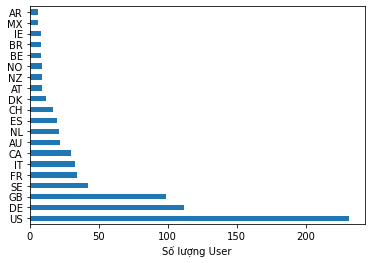

In [ ]:
userInCountry.head(20).plot.barh().set_xlabel('Số lượng User')

## 1.3.2 Quốc gia nào được yêu thích nhất?
+ Quốc gia được yêu thích được tính bằng tổng số lượng các flower của các user ở quốc gia đó 

In [ ]:
lovely_country = df.groupby("country_code")["followers_count"].sum()
lovely_country = lovely_country.sort_values(ascending = False)
lovely_country.head()

country_code
DE    1145362
GB     163388
US     144214
SE     113721
NL      98518
Name: followers_count, dtype: int64

### Trực quan hóa dữ liệu 

Text(0.5, 0, 'Số lượng Flower')

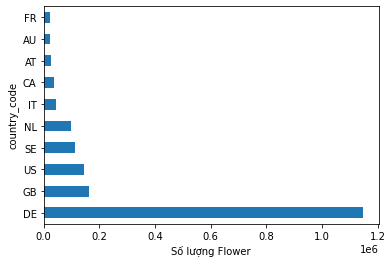

In [ ]:
lovely_country.head(10).plot.barh().set_xlabel('Số lượng Flower')

### 1.3.3 Xem xét sự tương quan của một user được xác nhận với số lượng follower của user đó?


In [ ]:
row = ["Non_Verified","Verified"]
col = ["Users_count","Followers_count"]
follower_data = []
follower_data.append(df.groupby("verified")["followers_count"].count().values)
follower_data.append(df.groupby("verified")["followers_count"].sum().values)

In [ ]:
follower_df = pd.DataFrame(follower_data, columns = row, index = col)
follower_df 

,Non_Verified,Verified
Users_count,831,34
Followers_count,858656,1477734


### Nhận xét
* Ta nhận thấy được số lượng user được xác nhận rất ít so với số lượng user chưa được xác nhận nhưng tổng số lượng follower của user đã được xác nhận cao hơn hẳn so với tổng số lượng follower của user chưa được xác nhận.

## Phần 2: Phân tích dữ liệu của Playlist
### 2.1. Danh sách mong đợi: 
- Sự phân bố của các biến chính, ở đây khi nhìn vào các biến có kiểu dữ liệu là số, bao gồm `duration`,`likes_count`, `reposts_count`, `track_count` tụi em mong muốn rằng gần như giá trị của các biến này đều sẽ trên mức trung bình, có thể một số vị trí ít hơn hoặc thấp hơn giá trị trung bình (có hình tương tự như hình tháp). 
- Mối quan hệ/ tương quan giữa các cặp biến, ở đây tụi em đặt câu hỏi liệu có sự tương quan nào giữa các cặp biến `reposts_count` - `likes_count`, `track_count` - `duration`hay không? 
    - `reposts_count` - `likes_count`: có phải những playlist có lượt repost (đăng tải lại) càng nhiều thì lượt like (thích) của chúng càng nhiều không? 
    - `track_count` - `duration`: số lượng các track có trong 1 playlist có ảnh hưởng gì đến thời lượng của playlist này hay không?



### 2.2. Danh sách kiểm tra phân tích dữ liệu
### Trả lời những câu hỏi về bộ dữ liệu: 
- Xác định số liệu trước khi bắt đầu: 
   - Thực hiện tổng quan về dữ liệu: thực hiện tìm hiểu ý nghĩa các cột dữ liệu, ở đây tụi em dựa trên nội dung hiểu và tài liệu 'SoundCloud Public API Specification' để đưa nội dung của các trường dữ liệu. 
- Thực hiện tổng quan về dữ liệu.

In [ ]:
df=pd.read_csv("playlist.csv")
df.head()

,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,managed_by_feeds,...,reposts_count,secret_token,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
0,1,https://i1.sndcdn.com/artworks-000000009550-e6...,2008-04-29T22:14:25Z,A collection of old sounds,826086,None,None,2012-07-23T07:46:33Z,6,False,...,3,None,None,Old things,8,False,2008-04-29T22:14:25Z,8,"43,274,53787294",3
1,18,https://i1.sndcdn.com/artworks-000067273270-ui...,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,Electronic,sonarkollektiv,2021-07-21T10:53:42Z,1541,False,...,262,None,downtempo sampling beats,Soulhack,183,True,2008-04-30T01:21:15Z,183,"290,291,292,293,294,295,296,297,298,299,300",11
2,32,None,2008-05-01T04:12:43Z,artist / noe\r\n,354742,ambient pop,Floor Limit,2015-10-13T13:39:25Z,2,False,...,0,None,"ambient electronica IDM electropop japan ""girl...",noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,1691,None,0
3,33,None,2008-05-01T04:13:55Z,None,254066,abstract hip-hop,Floor Limit,2015-10-13T13:35:10Z,1,False,...,0,None,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,1691,4795,1
4,34,None,2008-05-01T17:31:06Z,None,50620378,None,None,2021-10-16T14:55:49Z,1,False,...,0,None,None,Dj Mixes,2157,False,2008-05-01T17:31:06Z,2157,"859159762,438021198,274210741,274210163,215133...",10


### Tổng quan về dữ liệu

#### Ý nghĩa các cột dữ liệu	

* `id`	:Playlist identifier

* `artwork_url`:	URL to a JPEG image
* `created_at`	:Created timestamp
* `description`	:Playlist description
* `duration`	:Playlist duration in milliseconds
* `genre`	:Playlist genre
* `label_name`	:Label name
* `last_modified`	:Last modified timestamp
* `likes_count`	:Count of playlist likes
* `managed_by_feeds`	:Whether or not the playlist is managed by an RSS feed
* `permalink_url`	:Playlist permalink URL
* `public`	:Is the playlist public?
* `purchase_title`	:Purchase title
* `purchase_url`	:Purchase URL
* `release_date`	:Release timestamp
* `reposts_count`	:number of reposts from user
* `secret_token`	:secret_token
* `tag_list`	:Tags
* `title`	:Playlist title
* `user_id`	:User identifier
* `is_album`	:True if the playlist is an album, false if it is just a playlist
* `display_date`	:Display timestamp
* `user	SoundCloud` :User object who uploaded the track
* `tracks`	:List of tracks
* `track_count`	:Count of tracks

#### Xác định số liệu, kích thước của bộ dữ liệu

In [ ]:
num_rows=len(df)
num_cols=len(df.columns)
df=df.replace('None',np.NaN)
num_rows,num_cols


(1508, 25)

#### Xác định kiểu dữ liệu có trong bộ dữ liệu

In [ ]:
df = df.astype({"id":object,"user_id":object,"user":object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1508 non-null   object 
 1   artwork_url       485 non-null    object 
 2   created_at        1508 non-null   object 
 3   description       852 non-null    object 
 4   duration          1508 non-null   int64  
 5   genre             614 non-null    object 
 6   label_name        330 non-null    object 
 7   last_modified     1508 non-null   object 
 8   likes_count       1508 non-null   int64  
 9   managed_by_feeds  1508 non-null   bool   
 10  permalink_url     1508 non-null   object 
 11  public            1508 non-null   bool   
 12  purchase_title    16 non-null     object 
 13  purchase_url      185 non-null    object 
 14  release_date      242 non-null    object 
 15  reposts_count     1508 non-null   int64  
 16  secret_token      0 non-null      float64


In [ ]:
df.describe(include='all')

,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,managed_by_feeds,...,reposts_count,secret_token,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
count,1508.0,485,1508,852,1.508000e+03,614,330,1508,1508.000000,1508,...,1508.000000,0.0,357,1508,1508.0,1508,1508,1508.0,1137,1508.000000
unique,1508.0,485,1508,843,NaN,291,233,1316,NaN,1,...,NaN,NaN,335,1432,1001.0,2,1508,1001.0,1133,NaN
top,1.0,https://i1.sndcdn.com/artworks-000000009550-e6...,2008-04-29T22:14:25Z,Notice! These are hi MP3 files to download for...,NaN,Bluegrass,TheDancingSkeleton,2015-10-13T13:39:27Z,NaN,False,...,NaN,NaN,qburns qburnsabstractmessage q-burns DJ Astral...,Remixes,52955.0,False,2008-04-29T22:14:25Z,52955.0,36528,NaN
freq,1.0,1,1,4,NaN,115,27,41,NaN,1508,...,NaN,NaN,7,24,120.0,1197,1,120.0,2,NaN
mean,NaN,NaN,NaN,NaN,5.459063e+06,NaN,NaN,NaN,3.826923,NaN,...,0.531167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.285809
std,NaN,NaN,NaN,NaN,1.656793e+07,NaN,NaN,NaN,42.015732,NaN,...,7.066258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.294256
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,5.346672e+05,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,1.343620e+06,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,4.126062e+06,NaN,NaN,NaN,1.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


### 2.3. Tiền xử lý dữ liệu

Xóa dữ liệu: 
- Dữ liệu ở cột `managed_by_feeds`, `public`, `secret_token` chỉ mang 1 giá trị, không có ảnh hưởng đến các giá trị khác.
- Các dữ liệu đều phù hợp, không có giá trị ngoại lệ

In [ ]:
def del_columns(dataframe):
    dele=[]
    for col in dataframe.columns:
        count=dataframe[col].isnull().sum()
        if count == len(dataframe) or len(dataframe[col].unique())<=1:
            dele.append(col)
    return dele

dele=del_columns(df)
print(dele)
df=df.drop(columns=dele)
df.head()

['managed_by_feeds', 'public', 'secret_token']


,id,artwork_url,created_at,description,duration,genre,label_name,last_modified,likes_count,permalink_url,...,release_date,reposts_count,tag_list,title,user_id,is_album,display_date,user,tracks,track_count
0,1,https://i1.sndcdn.com/artworks-000000009550-e6...,2008-04-29T22:14:25Z,A collection of old sounds,826086,NaN,NaN,2012-07-23T07:46:33Z,6,https://soundcloud.com/alex/sets/remixes,...,NaN,3,NaN,Old things,8,False,2008-04-29T22:14:25Z,8,"43,274,53787294",3
1,18,https://i1.sndcdn.com/artworks-000067273270-ui...,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,Electronic,sonarkollektiv,2021-07-21T10:53:42Z,1541,https://soundcloud.com/forss/sets/soulhack,...,2003-06-02T00:00:00Z,262,downtempo sampling beats,Soulhack,183,True,2008-04-30T01:21:15Z,183,"290,291,292,293,294,295,296,297,298,299,300",11
2,32,NaN,2008-05-01T04:12:43Z,artist / noe\r\n,354742,ambient pop,Floor Limit,2015-10-13T13:39:25Z,2,https://soundcloud.com/ark/sets/noe,...,2005-07-30T00:00:00Z,0,"ambient electronica IDM electropop japan ""girl...",noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,1691,NaN,0
3,33,NaN,2008-05-01T04:13:55Z,NaN,254066,abstract hip-hop,Floor Limit,2015-10-13T13:35:10Z,1,https://soundcloud.com/ark/sets/akt-the-jn,...,2005-06-29T00:00:00Z,0,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,1691,4795,1
4,34,NaN,2008-05-01T17:31:06Z,NaN,50620378,NaN,NaN,2021-10-16T14:55:49Z,1,https://soundcloud.com/kimik/sets/dj-mixes,...,NaN,0,NaN,Dj Mixes,2157,False,2008-05-01T17:31:06Z,2157,"859159762,438021198,274210741,274210163,215133...",10


### 2.4. Khám phá và phân tích dữ liệu
- Mối quan hệ đơn biến:
    - Để thể hiện mối quan hệ đơn biến của các biến, tụi em sử dụng biểu đồ dạng `distplot`. 
    - Ở mỗi biểu đồ, trục hoành thể hiện các giá trị của cột dữ liệu đang xét, trục tung thể hiện phần trăm của các giá trị có trong bộ dữ liệu.
- Kết quả của việc dự đoán sự phân bố của các biến chính: nhìn chung các sự phân bố này khá gần với mong đợi được nêu ở trên, tuy nhiên, khoảng các giá trị thấp hơn trung bình nhiều hơn tụi em đã mong đợi. 

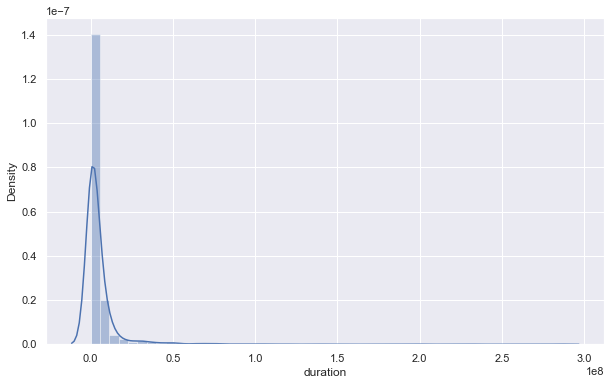

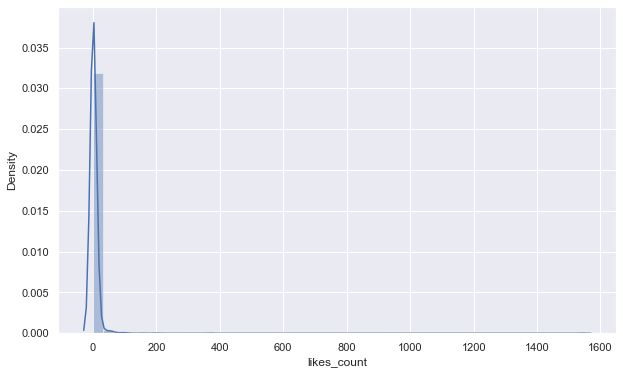

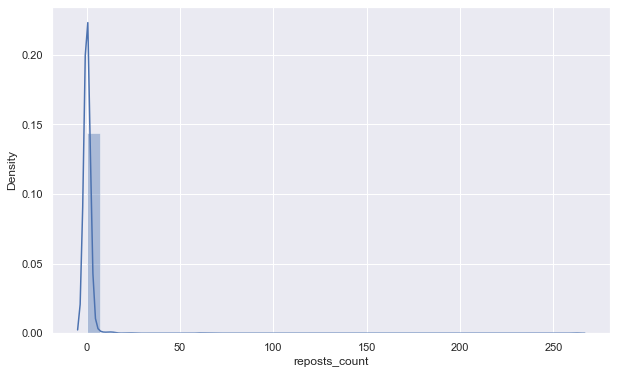

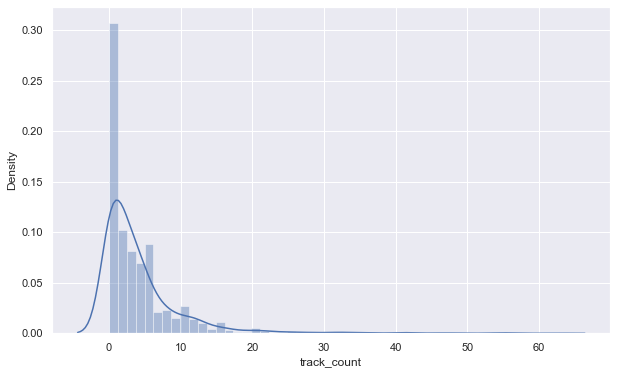

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sb.set(rc={"figure.figsize": (10, 6)})
cols=df.select_dtypes('number').columns
for col in cols:
    sb.distplot(df[col])
    plt.show()
#sb.distplot(df['likes_count'])

- Các tương quan đa biến:
    - Ở đây, tụi em sử dụng `correlation matrix` để tìm ra sự tương quan giữa các biến chính, sau đó sử dụng biểu đồ dạng `heatmap` để mô hình hoá ma trận vừa tìm được. 

In [ ]:
corr_matrix=df.corr()
corr_matrix

,duration,likes_count,reposts_count,is_album,track_count
duration,1.000000,0.090257,0.078174,-0.100378,0.439010
likes_count,0.090257,1.000000,0.994259,0.046156,0.121882
reposts_count,0.078174,0.994259,1.000000,0.045895,0.101707
is_album,-0.100378,0.046156,0.045895,1.000000,0.046134
track_count,0.439010,0.121882,0.101707,0.046134,1.000000


<AxesSubplot:>

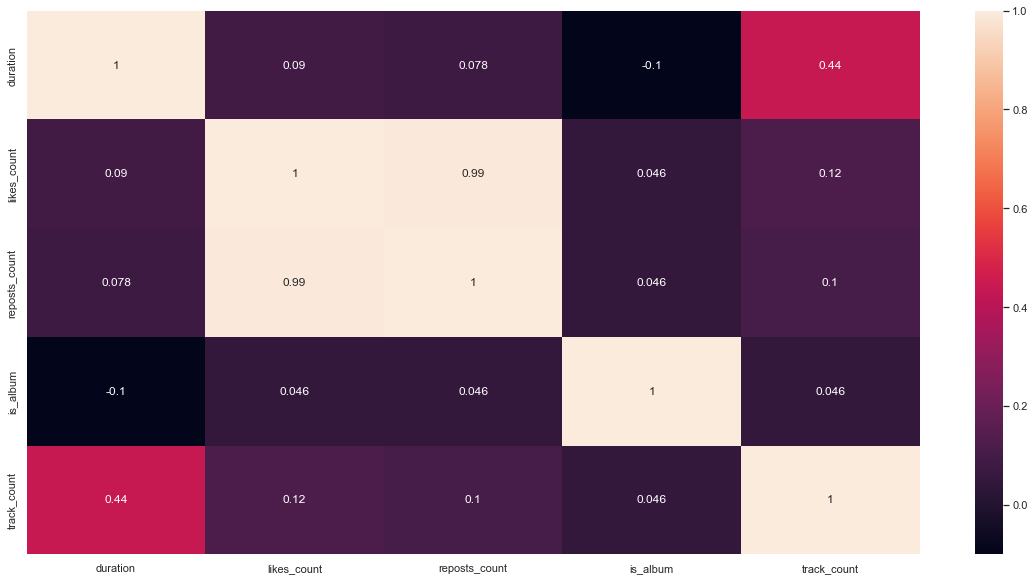

In [ ]:
plt.figure(figsize=[20,10])
sb.heatmap(df.corr(),annot=True)

- Dựa vào ma trận quan hệ trên, ta có thể rút ra kết luận cho các câu hỏi đã đặt ra bên trên như sau: 
    - `reposts_count` - `likes_count`: có mối quan hệ tương quan dương và hệ số tương quan lớn (0.99), gần như đạt được đồng biến tuyệt đối, có nghĩa rằng `reposts_count` - `likes_count` quan hệ đồng biến với nhau. 
    - `track_count` - `duration`: có mối quan hệ tương quan dương và hệ số tương quan tương đối lớn (0.44), có nghĩa rằng `track_count` - `duration` quan hệ đồng biến với nhau nhưng ở mức độ trung bình - khá. 

### 2.5. Trả lời câu hỏi:

#### Câu hỏi 1: Lượt like và repost của một playlist có liên quan tới nhau?

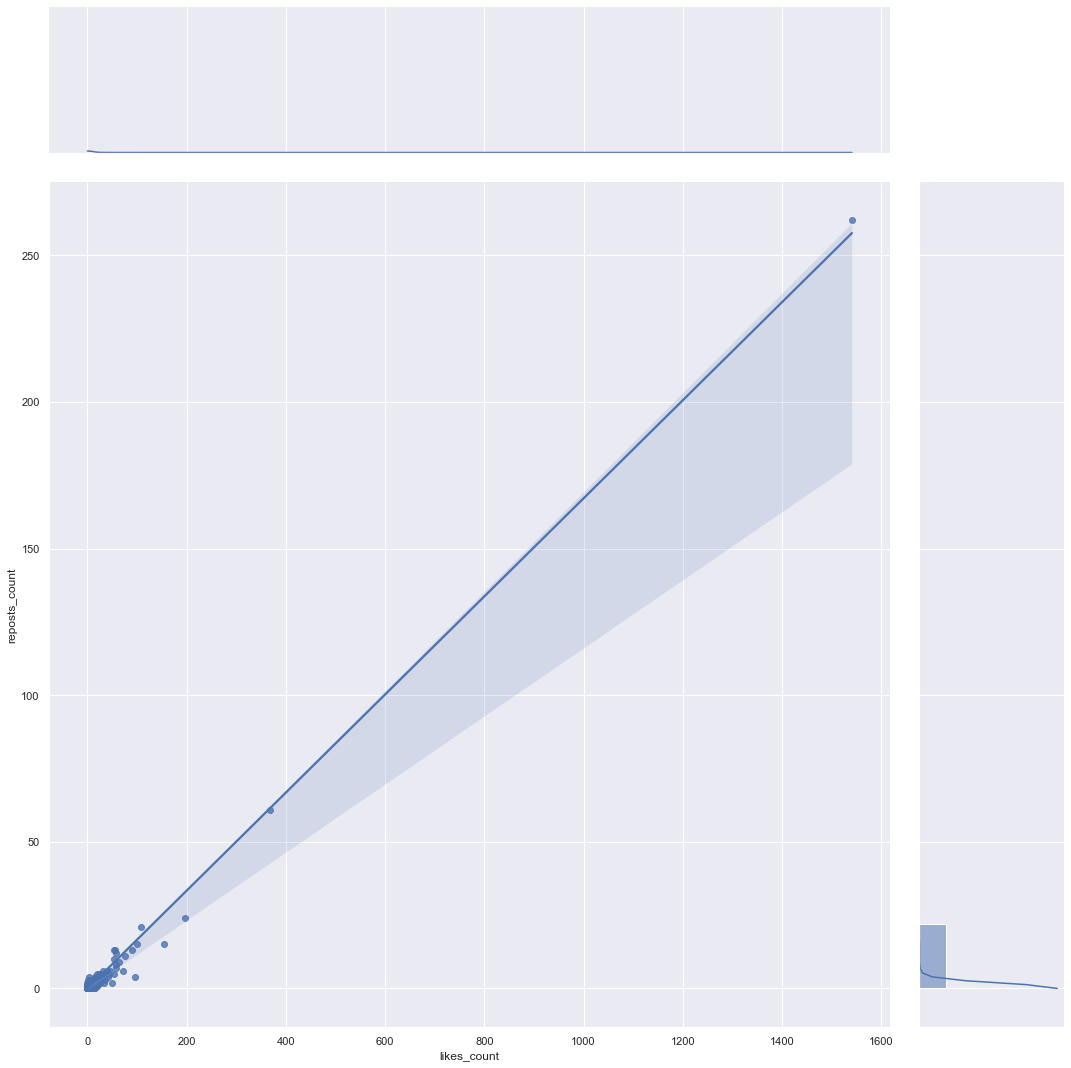

In [ ]:
data = df[["likes_count", "reposts_count"]]
sb.jointplot(data=data, x="likes_count", y="reposts_count",kind = "reg", height = 15)
plt.show()

- Nhìn vào biểu đồ trên, ta có thể hình dung được rằng `likes_count` và `reposts_count` có quan hệ với nhau, nhưng do giá trị của các đặc trưng có trong bộ dữ liệu đang xét nhỏ, nên ta thấy rằng các điểm mô tả tập trung gần về giá trị gốc $(0,0)$. Ở đây, tụi em chọn thêm dạng phát hoạ là "reg" tương ứng với regression (hồi quy) để thể hiện rõ hơn tương quan giữa cặp biến này. Theo kết quả trực quan hoá nhận được, ta có thể kết luận rằng `likes_count` và `reposts_count` tỉ lệ thuận với nhau. 


### Câu hỏi 2: Tổng số playlists qua từng thời kì (tháng, năm)?

In [ ]:
#Tien xu ly du lieu
month_year=pd.to_datetime(df['display_date'])
month_year = month_year.apply(lambda x: x.strftime('%Y-%B')) 
month_year

0          2008-April
1          2008-April
2            2008-May
3            2008-May
4            2008-May
            ...      
1503    2009-February
1504    2009-February
1505    2009-February
1506    2009-February
1507    2009-February
Name: display_date, Length: 1508, dtype: object

In [ ]:
#Khai thac du lieu
survey_year_playlist = pd.DataFrame(np.array([np.array(df['id']),month_year]).T,columns=['count_playlists','month_year'])

survey_year_playlist = survey_year_playlist.groupby(['month_year']).sum()
survey_year_playlist

,count_playlists
month_year,
2008-April,19
2008-August,36758
2008-December,575850
2008-July,25188
2008-June,2066
2008-May,1345
2008-November,460292
2008-October,362021
2008-September,89965


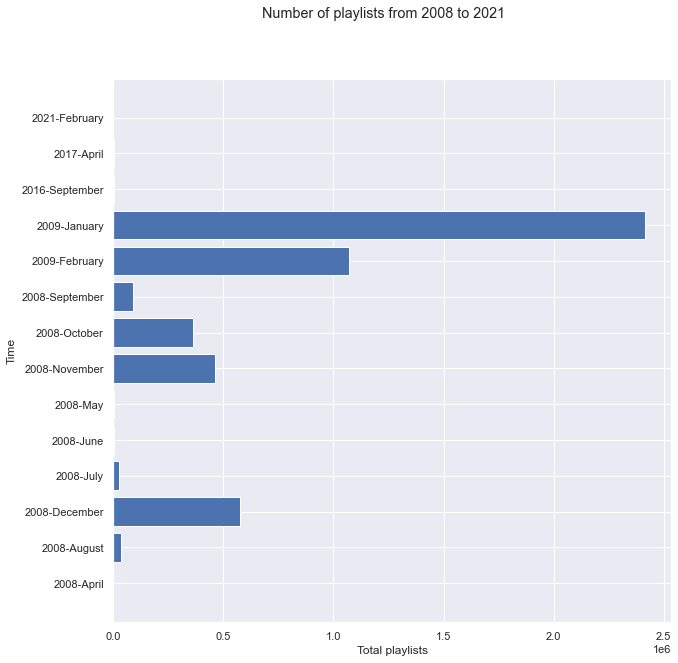

In [ ]:
#Ve bieu do
plt.figure(figsize=(10,10))
x=survey_year_playlist.index.get_level_values('month_year')
y=survey_year_playlist['count_playlists']
plt.barh(x,y)
plt.ylabel("Time")
plt.xlabel("Total playlists")
plt.suptitle('Number of playlists from 2008 to 2021')
plt.show()

+ Trong bộ dữ liệu này, tổng số playlist được tạo tăng theo thời gian và đạt nhiều nhất vào tháng 1-2009. Tuy nhiên vẫn có khoảng thời gian ở giữa giai đoạn này mà số lượng playlist được tạo thấp hơn những tháng trước đó. Đặc biệt sau tháng 1-2009, số lượng playlist rất ít và có xu hướng giảm dần. Do đó có thể thấy số lượng playlist không hoàn toàn tỉ lệ thuận với thời gian.

### Câu hỏi 3: Số track càng nhiều thì thời lượng playlist càng lâu?

Tiền xử lý dữ liệu:
- Thực hiện chuyển giá trị của cột `duration` từ millisecond thành second. 

In [ ]:
import copy
df_2 = copy.deepcopy(df)
df_2["duration"] = df_2["duration"]/100000

Vẽ biểu đồ

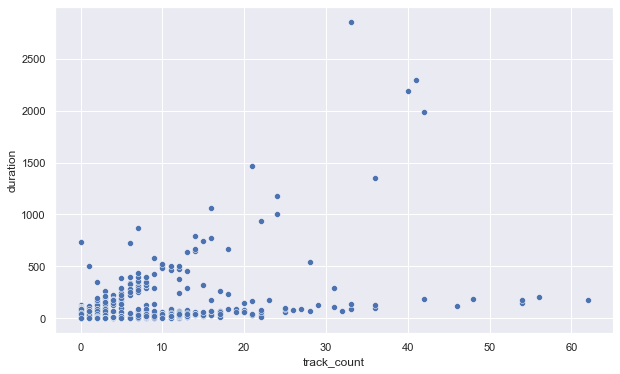

In [ ]:
timing_df = df_2[["track_count", "duration"]]
sb.scatterplot(data=timing_df, x="track_count", y="duration")
plt.show()

Dựa vào biểu đồ, ta thấy phần lớn các điểm mô tả tập trung gần về toạ độ gốc, chứng tỏ rằng các playlist có số lượng track nhỏ thì thời gian cũng nhỏ. Tuy nhiên, biểu đồ vẫn có các điểm mà tại đó thời lượng rất lớn nhưng số track lại nằm ở mức trung bình. Do đó, ta thấy rằng `track_count` và `duration` có tỉ lệ thuận với nhau, nhưng vẫn còn tồn tại các ngoại lệ. 

## Phần 3: Phân tích dữ liệu tracks

### Thông tin cơ bản về dữ liệu 
   * **id**:              Mã định danh của track
   * **artwork_url**:     Đường dẫn đến avatar của track
   * **caption**:     Tiêu đề của track
   * **comment_count**: Số lượng bình luận
   * **download_count**:  Số lượng download của track
   * **last_modified**:   Lần chỉnh sửa cuối cùng về thông tin của track
   * **permalink_url**:   Đường dẫn trực tiếp đến track trên soundcloud
   * **duration**:        Thời lượng của track
   * **title**:        Tên track trên soundcloud
   * **genre**:        Thể loại của track
   * **likes_count**:    Số lượng likes cho track
   
## Nội dung thực hiện 
###     1. Tiền xử lí dữ liệu 
   * Thay thế "None" bằng Nan
   * Xóa các bộ dữ liệu có tỉ lệ missing lớn hơn 25%
 
###     2. Câu hỏi 
   * Tương quan giữa số lượng lượt likes và comment trong một bài nhạc
   * Dòng nhạc nào đang được ưa chuộng qua các năm

In [ ]:
df=pd.read_csv("track.csv")
df.head()

,id,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,...,state,streamable,tag_list,title,track_format,display_date,monetization_model,mime_type,quality,owner
0,43,https://i1.sndcdn.com/artworks-000000009541-24...,None,True,43,2007-08-03T20:34:54Z,Yet another old file from a long time ago…,True,390,66456,...,finished,True,flute loop strings,Philip's Push,single-track,2007-08-03T20:34:54Z,NOT_APPLICABLE,audio/mpeg,sq,8
1,274,https://i1.sndcdn.com/artworks-000260720873-yk...,None,True,53,2007-09-20T12:23:26Z,"Messing around with live, might try and make s...",True,1602,207516,...,finished,True,sketch 80ies samples vocal drummachine funky,The Man I Want To Be,single-track,2007-09-20T12:23:26Z,AD_SUPPORTED,audio/mpeg,sq,8
2,53787294,None,None,True,81,2012-07-23T07:45:52Z,Done at some point in 2004 for a car commercia...,None,None,165156,...,finished,True,filmscore,2004 Car Commercial,single-track,2012-07-23T07:45:52Z,AD_SUPPORTED,audio/mpeg,sq,8
3,290,https://i1.sndcdn.com/artworks-000067273298-mj...,None,True,104,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531,142236,...,finished,True,cinematic intro,City Ports,single-track,2007-09-22T14:24:38Z,AD_SUPPORTED,audio/mpeg,sq,183
4,291,https://i1.sndcdn.com/artworks-000067273301-we...,None,True,176,2007-09-22T14:32:59Z,From the Soulhack album,True,7288,274442,...,finished,True,jazz,Soulhack,single-track,2007-09-22T14:32:59Z,AD_SUPPORTED,audio/mpeg,sq,183


### 3.1 Tiền xử lý dữ liệu:

<strong> Chuyển các dữ liệu "None" về Nan </strong>

In [ ]:
def isNaN(num):
    return num!=num
#convert none into nan
df=df.replace("None",np.nan)

<strong> Xóa các dòng dữ liệu có dữ liệu bị thiếu trên 25% </strong>

In [ ]:
def delMissingRow(Data, limit):
    data_temp=copy.deepcopy(Data)
    percent=0
    count=0
    end = len(data_temp['id'])
    i=0
    missingList=[]
    while i<end:
        count=0
        for key in data_temp:
            if isNaN(data_temp[key][i]):
                count+=1
        if(count/len(data_temp.columns))>limit/100:
            missingList.append(i)
        i+=1
    data_temp=data_temp.drop(labels=missingList,axis=0)
    return data_temp
df=delMissingRow(df,25)
df.head()

,id,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,...,state,streamable,tag_list,title,track_format,display_date,monetization_model,mime_type,quality,owner
0,43,https://i1.sndcdn.com/artworks-000000009541-24...,NaN,True,43,2007-08-03T20:34:54Z,Yet another old file from a long time ago…,True,390,66456,...,finished,True,flute loop strings,Philip's Push,single-track,2007-08-03T20:34:54Z,NOT_APPLICABLE,audio/mpeg,sq,8
1,274,https://i1.sndcdn.com/artworks-000260720873-yk...,NaN,True,53,2007-09-20T12:23:26Z,"Messing around with live, might try and make s...",True,1602,207516,...,finished,True,sketch 80ies samples vocal drummachine funky,The Man I Want To Be,single-track,2007-09-20T12:23:26Z,AD_SUPPORTED,audio/mpeg,sq,8
3,290,https://i1.sndcdn.com/artworks-000067273298-mj...,NaN,True,104,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531,142236,...,finished,True,cinematic intro,City Ports,single-track,2007-09-22T14:24:38Z,AD_SUPPORTED,audio/mpeg,sq,183
4,291,https://i1.sndcdn.com/artworks-000067273301-we...,NaN,True,176,2007-09-22T14:32:59Z,From the Soulhack album,True,7288,274442,...,finished,True,jazz,Soulhack,single-track,2007-09-22T14:32:59Z,AD_SUPPORTED,audio/mpeg,sq,183
5,292,https://i1.sndcdn.com/artworks-000067273305-sn...,NaN,True,68,2007-09-22T14:41:54Z,From the Soulhack album,True,3942,463908,...,finished,True,jazz,Funk for Nerds,single-track,2007-09-22T14:41:54Z,AD_SUPPORTED,audio/mpeg,sq,183


### 3.2.  Trả lời câu hỏi:
#### 3.2.1. Tương quan giữa lượt like và comment
* Thực hiện: phân tích tương quan của số lượt like với trung bình số comment

* Ý tưởng thực hiện: 
    * Tạo list số lượt like có tồn tại trong dữ liệu, sắp xếp theo thứ tự tăng dần
    * Tính trung bình số lượt comment của số lượt like đó. Ví dụ: với các track có số lượt like là 10, sẽ tính trung bình số lượt comment của các track đó. Lưu tất cả về 1 list
    * Vẽ biểu đồ line để xem xu hướng phát triển của dữ liệu
    * Thực hiện khám phá và vẽ thêm các biểu đồ khác để đánh giá tốt hơn dữ liệu

* Ý nghĩa: xem mỗi lượt like là lượt người thực sự yêu thích, lượt comment là người thực sự quan tâm, muốn chia sẻ về track đó. 
    * Đánh giá được mức độ quan tâm của người dùng khi nghe nhạc trên Soundcloud. 
    * Trang web có thực sự được nhiều lượt quan tâm không hay chỉ là quan tâm ảo.
    * Khi lượt like tăng thì lượt comment có thực sự tăng theo hay không?

In [ ]:
# tạo một dataframe tạm để lưu dữ liệu likes_count và comment_count
df_temp = pd.DataFrame(df[['likes_count','comment_count']])
df_temp

,likes_count,comment_count
0,58,43
1,119,53
3,331,104
4,1065,176
5,594,68
...,...,...
2717,883,208
2724,38,17
2726,29,2
2730,2,5


In [ ]:
# tạo list số lượng lượt like likes_count_list
# sắp xếp list theo thứ tự tăng dần để dễ cho quá trình trực quan phía sau
likes_count_list = df_temp['likes_count'].unique().tolist()
likes_count_list.remove(np.nan)
int_map = map(int, likes_count_list)
likes_count_list = list(int_map)
likes_count_list.sort()
likes_count_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 74,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 96,
 98,
 101,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 117,
 119,
 122,
 123,
 125,
 126,
 127,
 130,
 131,
 132,
 133,
 135,
 137,
 141,
 143,
 145,
 148,
 151,
 154,
 155,
 157,
 159,
 161,
 176,
 179,
 180,
 184,
 188,
 191,
 192,
 194,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 231,
 246,
 257,
 258,
 261,
 265,
 271,
 276,
 304,
 311,
 318,
 319,
 320,
 325,
 328,
 331,
 337,
 340,
 342,
 345,
 346,
 366,
 408,
 420,
 431,
 432,
 503,
 509,
 522,
 552,
 594,
 615,
 619,
 636,
 642,
 681,
 687,
 718,
 783,
 852,
 883,
 891,
 1065,
 1134,
 1278,
 1546,
 26

In [ ]:
# tạo list số lượng lượt comment comment_count_list
# vì tính tương ứng theo số lượt like, nên thứ tự list này tương ứng với thứ tự list lượt like
comment_count_list = []
for i in range(len(likes_count_list)):
    comment_count_temp = df_temp.loc[df_temp['likes_count'] == str(likes_count_list[i]), 'comment_count'].tolist()
    temp = 0
    for j in comment_count_temp:
        if isNaN(j) ==False:
            temp += int(j)
    temp = round((temp/len(comment_count_temp)),2)
    comment_count_list.append(temp)
comment_count_list

[1.22,
 1.75,
 1.84,
 1.92,
 2.09,
 3.27,
 3.31,
 7.52,
 2.79,
 3.6,
 4.12,
 4.18,
 1.92,
 4.07,
 3.0,
 7.5,
 5.56,
 4.58,
 6.17,
 6.77,
 6.33,
 6.17,
 6.0,
 4.25,
 5.89,
 11.25,
 7.0,
 12.57,
 9.33,
 6.67,
 5.83,
 4.67,
 5.0,
 8.67,
 4.0,
 9.4,
 9.0,
 13.71,
 17.2,
 9.33,
 4.67,
 15.0,
 13.67,
 11.33,
 13.0,
 15.0,
 8.0,
 18.5,
 15.0,
 11.6,
 7.25,
 0.0,
 12.75,
 5.0,
 18.33,
 23.0,
 25.0,
 22.5,
 34.0,
 10.5,
 26.75,
 8.0,
 19.0,
 13.33,
 24.0,
 17.5,
 10.25,
 30.0,
 9.0,
 35.5,
 10.5,
 14.5,
 20.0,
 38.0,
 16.0,
 10.33,
 43.0,
 25.0,
 8.0,
 28.0,
 13.5,
 3.0,
 55.0,
 12.0,
 7.0,
 8.0,
 43.0,
 13.0,
 6.0,
 10.0,
 9.0,
 11.0,
 5.5,
 5.0,
 19.0,
 16.0,
 27.5,
 38.0,
 12.67,
 54.0,
 48.0,
 84.0,
 16.0,
 35.0,
 14.0,
 12.5,
 78.0,
 10.0,
 27.0,
 11.5,
 14.0,
 54.0,
 9.33,
 13.0,
 16.5,
 24.0,
 19.0,
 11.0,
 4.0,
 9.0,
 34.0,
 7.0,
 8.0,
 65.0,
 17.0,
 45.0,
 17.5,
 10.0,
 23.5,
 8.0,
 80.0,
 15.0,
 3.0,
 20.5,
 10.0,
 38.0,
 44.0,
 49.0,
 10.0,
 24.0,
 36.0,
 29.0,
 28.0,
 19.0,
 10.0,
 

In [ ]:
# tạo dataframe để dùng cho quá trình trực quan, vẽ biểu đồ
df_final = pd.DataFrame({'likes count' : likes_count_list,'comment count' : comment_count_list})
df_final

,likes count,comment count
0,1,1.22
1,2,1.75
2,3,1.84
3,4,1.92
4,5,2.09
...,...,...
184,18612,270.00
185,20017,326.00
186,20801,428.00
187,61672,608.00


### Trực quan hóa dữ liệu

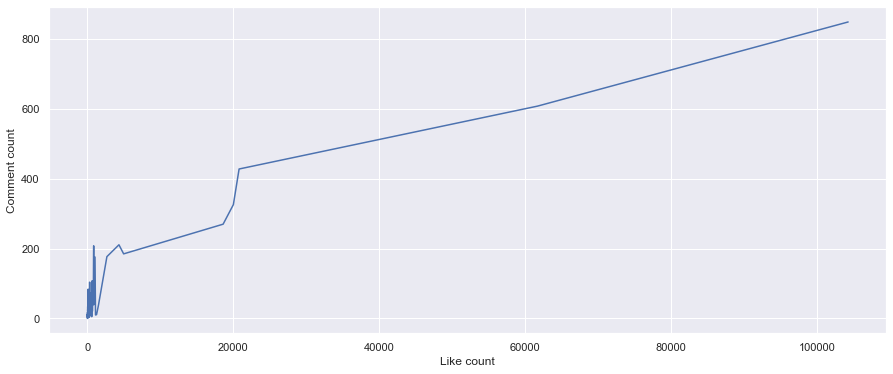

In [ ]:
# vẽ một biểu đồ đường để nhìn tổng quan dữ liệu
plt.figure(figsize=(15,6))
plt.xlabel("Like count")
plt.ylabel("Comment count")
plt.plot(df_final['likes count'], df_final['comment count'])
plt.show()

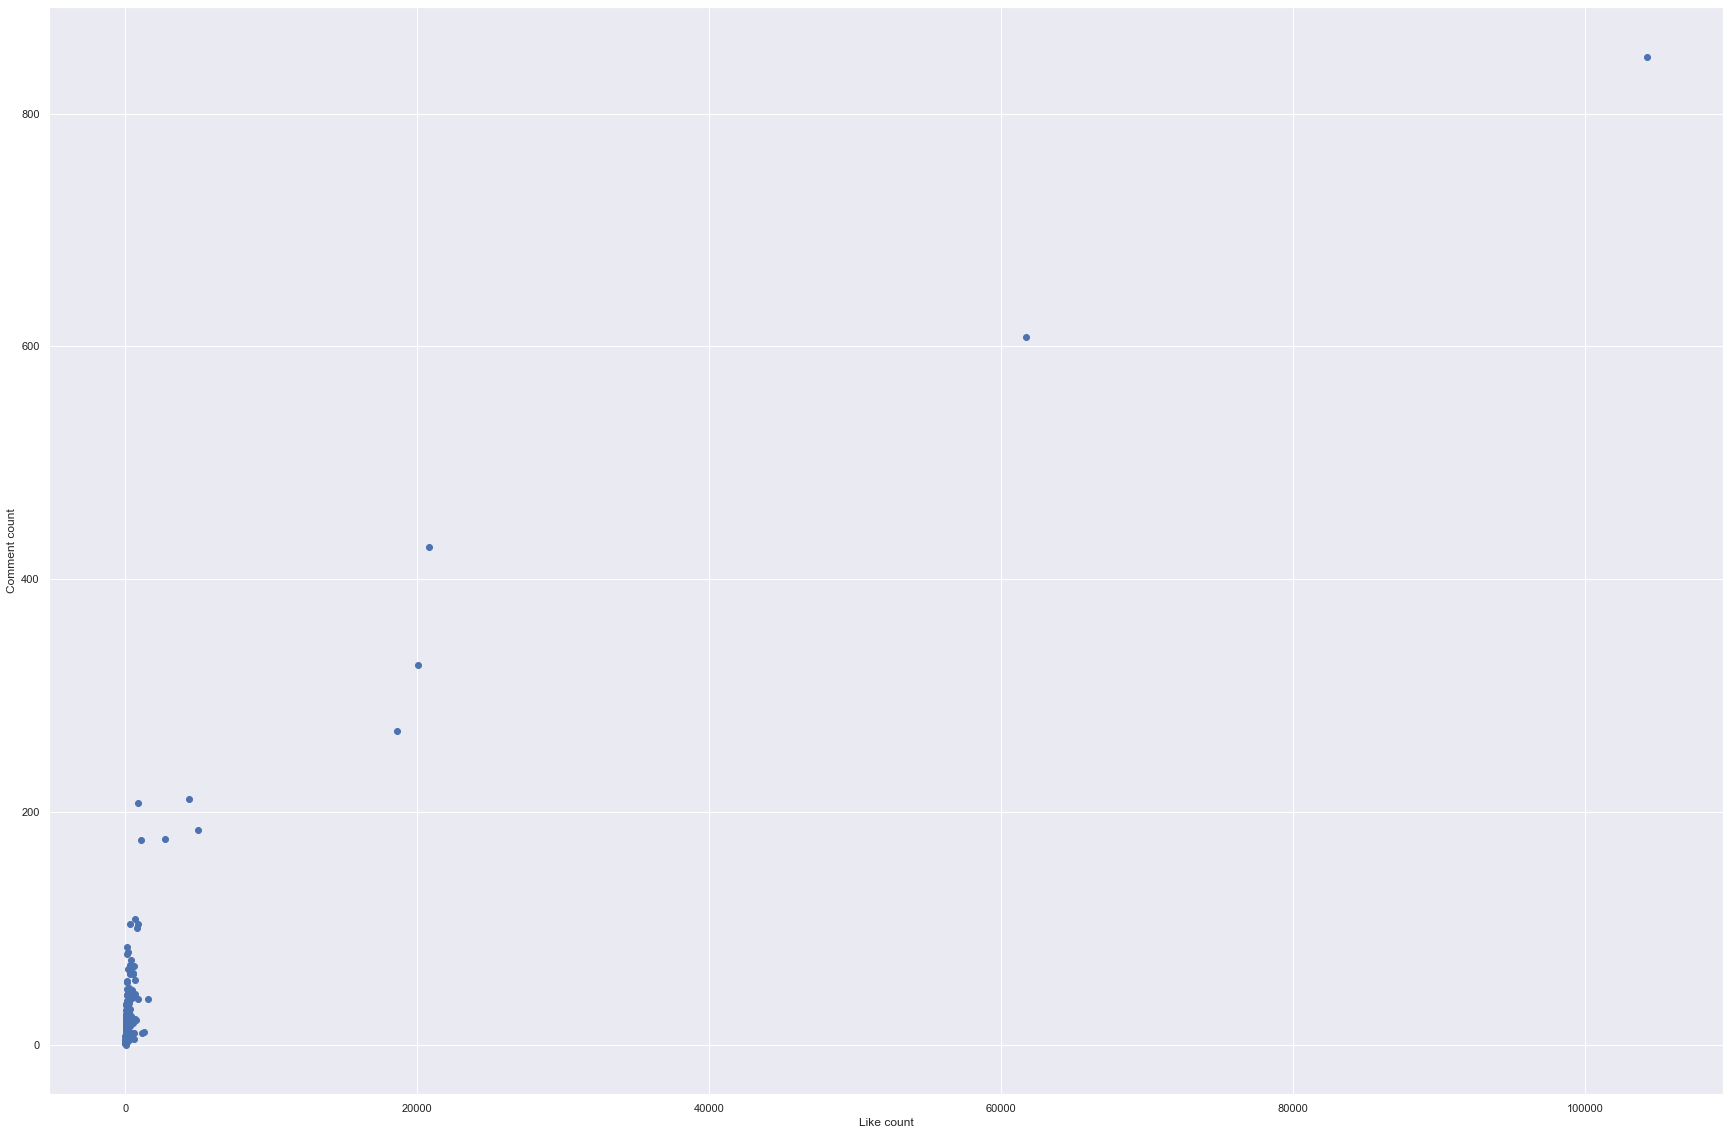

In [ ]:
# vẽ biểu đồ phân tán của dữ liệu
plt.figure(figsize=(30,20))
plt.xlabel("Like count")
plt.ylabel("Comment count")
plt.scatter(df_final['likes count'], df_final['comment count'])
plt.show()

Dễ nhận thấy một số điểm sau ở biểu đồ trên

* Dữ liệu phân tán chủ yếu ở đoạn lượt like dưới 10000
* Có một vài dữ liệu nằm ngoài đoạn phân tán. Ví dụ lượt like là 104229 với số comment là 849 -> đây có thể là một track được nhiều người biết tới, được phổ biến và có rất nhiều người quan tâm.

Một số dữ bộ dữ liệu ở cuối dataframe cũng tương tự, vì vậy sẽ loại bỏ các dữ liệu này để vẽ ở khu vực dữ liệu tập trung nhiều (lượt like dưới 10000)

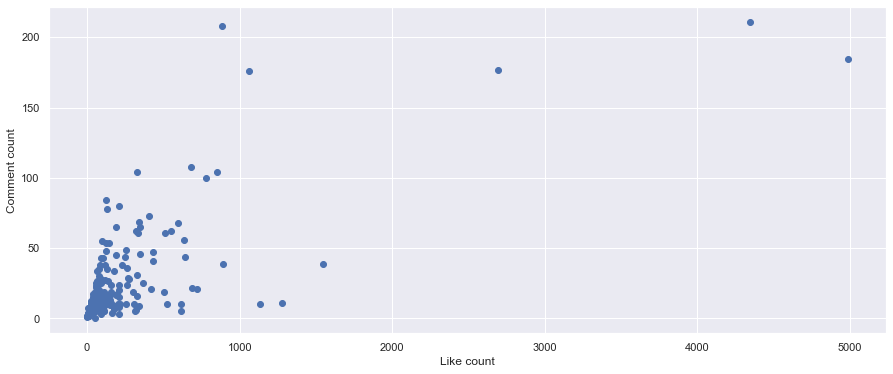

In [ ]:
# vẽ biểu đồ với dữ liệu like count nhỏ hơn 10000
plt.figure(figsize=(15,6))
plt.xlabel("Like count")
plt.ylabel("Comment count")
plt.scatter(df_final['likes count'].loc[df_final['likes count'] < 10000],
            df_final['comment count'].loc[df_final['likes count'] < 10000])
plt.show()

Với dữ liệu này, tiếp tục có một số dữ liệu lớn, nằm ngoài vùng tập trung chính, vì vậy, ta sẽ tiếp tục vẽ thêm 1 biểu đồ nữa, với dữ liệu lượt like dưới 2000

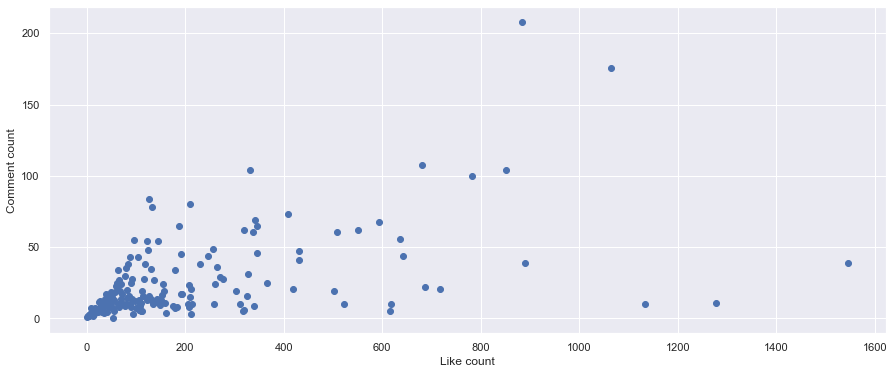

In [ ]:
# vẽ biểu đồ với dữ liệu like count nhỏ hơn 2000
plt.figure(figsize=(15,6))
plt.xlabel("Like count")
plt.ylabel("Comment count")
plt.scatter(df_final['likes count'].loc[df_final['likes count'] < 2000],
            df_final['comment count'].loc[df_final['likes count'] < 2000])
plt.show()

Có thể thấy
* Dữ liệu tập trung ở khoảng dưới 400 là chính -> sự tương tác của người dùng với dữ liệu tương đối lớn, trung bình lượt comment cũng khá cao (xấp xỉ 50)
* Dữ liệu không có xu hướng tăng hay giảm cụ thể, mà có sự biến đổi không theo quy luật (sẽ thấy rõ hơn ở biểu đồ phía sau)

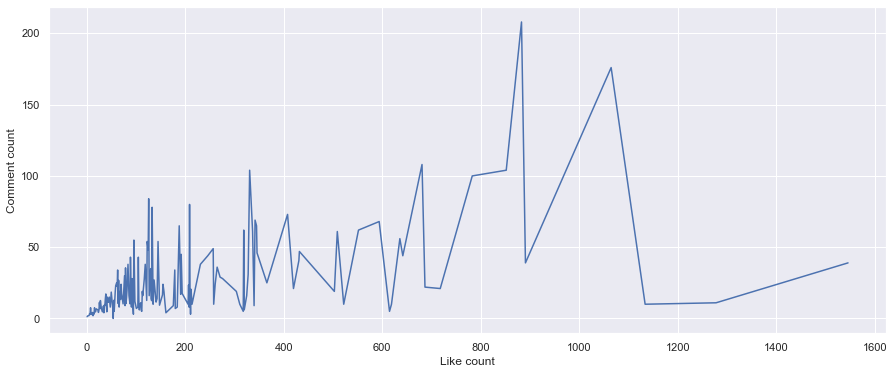

In [ ]:
# vẽ biểu đồ đường của 2 dữ liệu
plt.figure(figsize=(15,6))
plt.xlabel("Like count")
plt.ylabel("Comment count")
plt.plot(df_final['likes count'].loc[df_final['likes count'] < 2000],
            df_final['comment count'].loc[df_final['likes count'] < 2000])
plt.show()

* Dữ liệu không đi theo xu hướng, mà có sự thay đổi lên xuống thất thường
* Ở số lượt like dưới 400, lượt comment trung bình trong khoảng 0 - 100
* Với các lượt like lớn hơn, nhìn chung các biến đổi khá thất thường -> có một vài track có lượt quan tâm rất lớn

### Kết luận
* Người dung Soundcloud có nhiều tương tác với các track có trên hệ thống
* Không có một xu hướng cố định về lượt comment trung bình -> hành vi của người dùng khi nghe nhạc không cố định, phụ thuộc khá nhiều vào nội dung track, người đăng là ai,...

#### 3.2.2. Dòng nhạc được thịnh hành qua các năm
+ Thống kê các thể loại âm nhạc qua các năm, từ đó phần nào biết được xu hướng âm nhạc hiện
Việc thống kê dựa trên việc phân tích dữ liệu của hai cột là `genre` và `release_date`

In [ ]:
list_years=[]
list_genre=[]
df_years = df['release_date'].tolist()
df_genre=df['genre'].tolist()

for i in range(0,len(df['id'])):
    if isNaN(df_genre[i])==False and isNaN(df_years[i])==False:
        temp=df_genre[i].split('/')
        for j in temp:
            j=j.lower()
            list_genre.append(j)
            year=df_years[i][:4]
            list_years.append(year)

In [ ]:
df1 = pd.DataFrame(list(zip(list_years, list_genre)), columns =['Year', 'Genre'])
res= df1.groupby(["Year", "Genre"]).size().reset_index(name="Time")
res['Year']

0      1993
1      1995
2      1997
3      1997
4      1998
       ... 
273    2019
274    2019
275    2020
276    2021
277    2021
Name: Year, Length: 278, dtype: object

In [ ]:
t=df1['Genre'].value_counts(normalize=True)*100
t=t.round(1)
t.sort_values(ascending=False)
t=t[:20]

### Tương quan một biến
Mức độ phân bố của các dòng nhạc qua các năm

<AxesSubplot:>

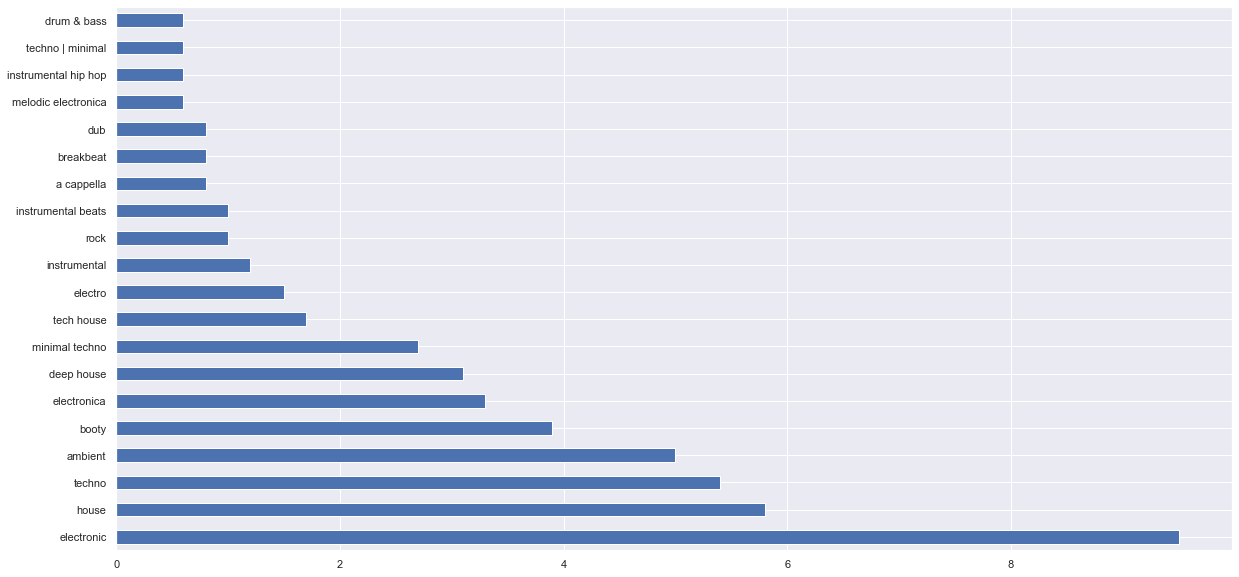

In [ ]:
t.plot(figsize=(20,10),kind='barh')

#### Phân bố dòng nhạc thịnh hành qua các năm

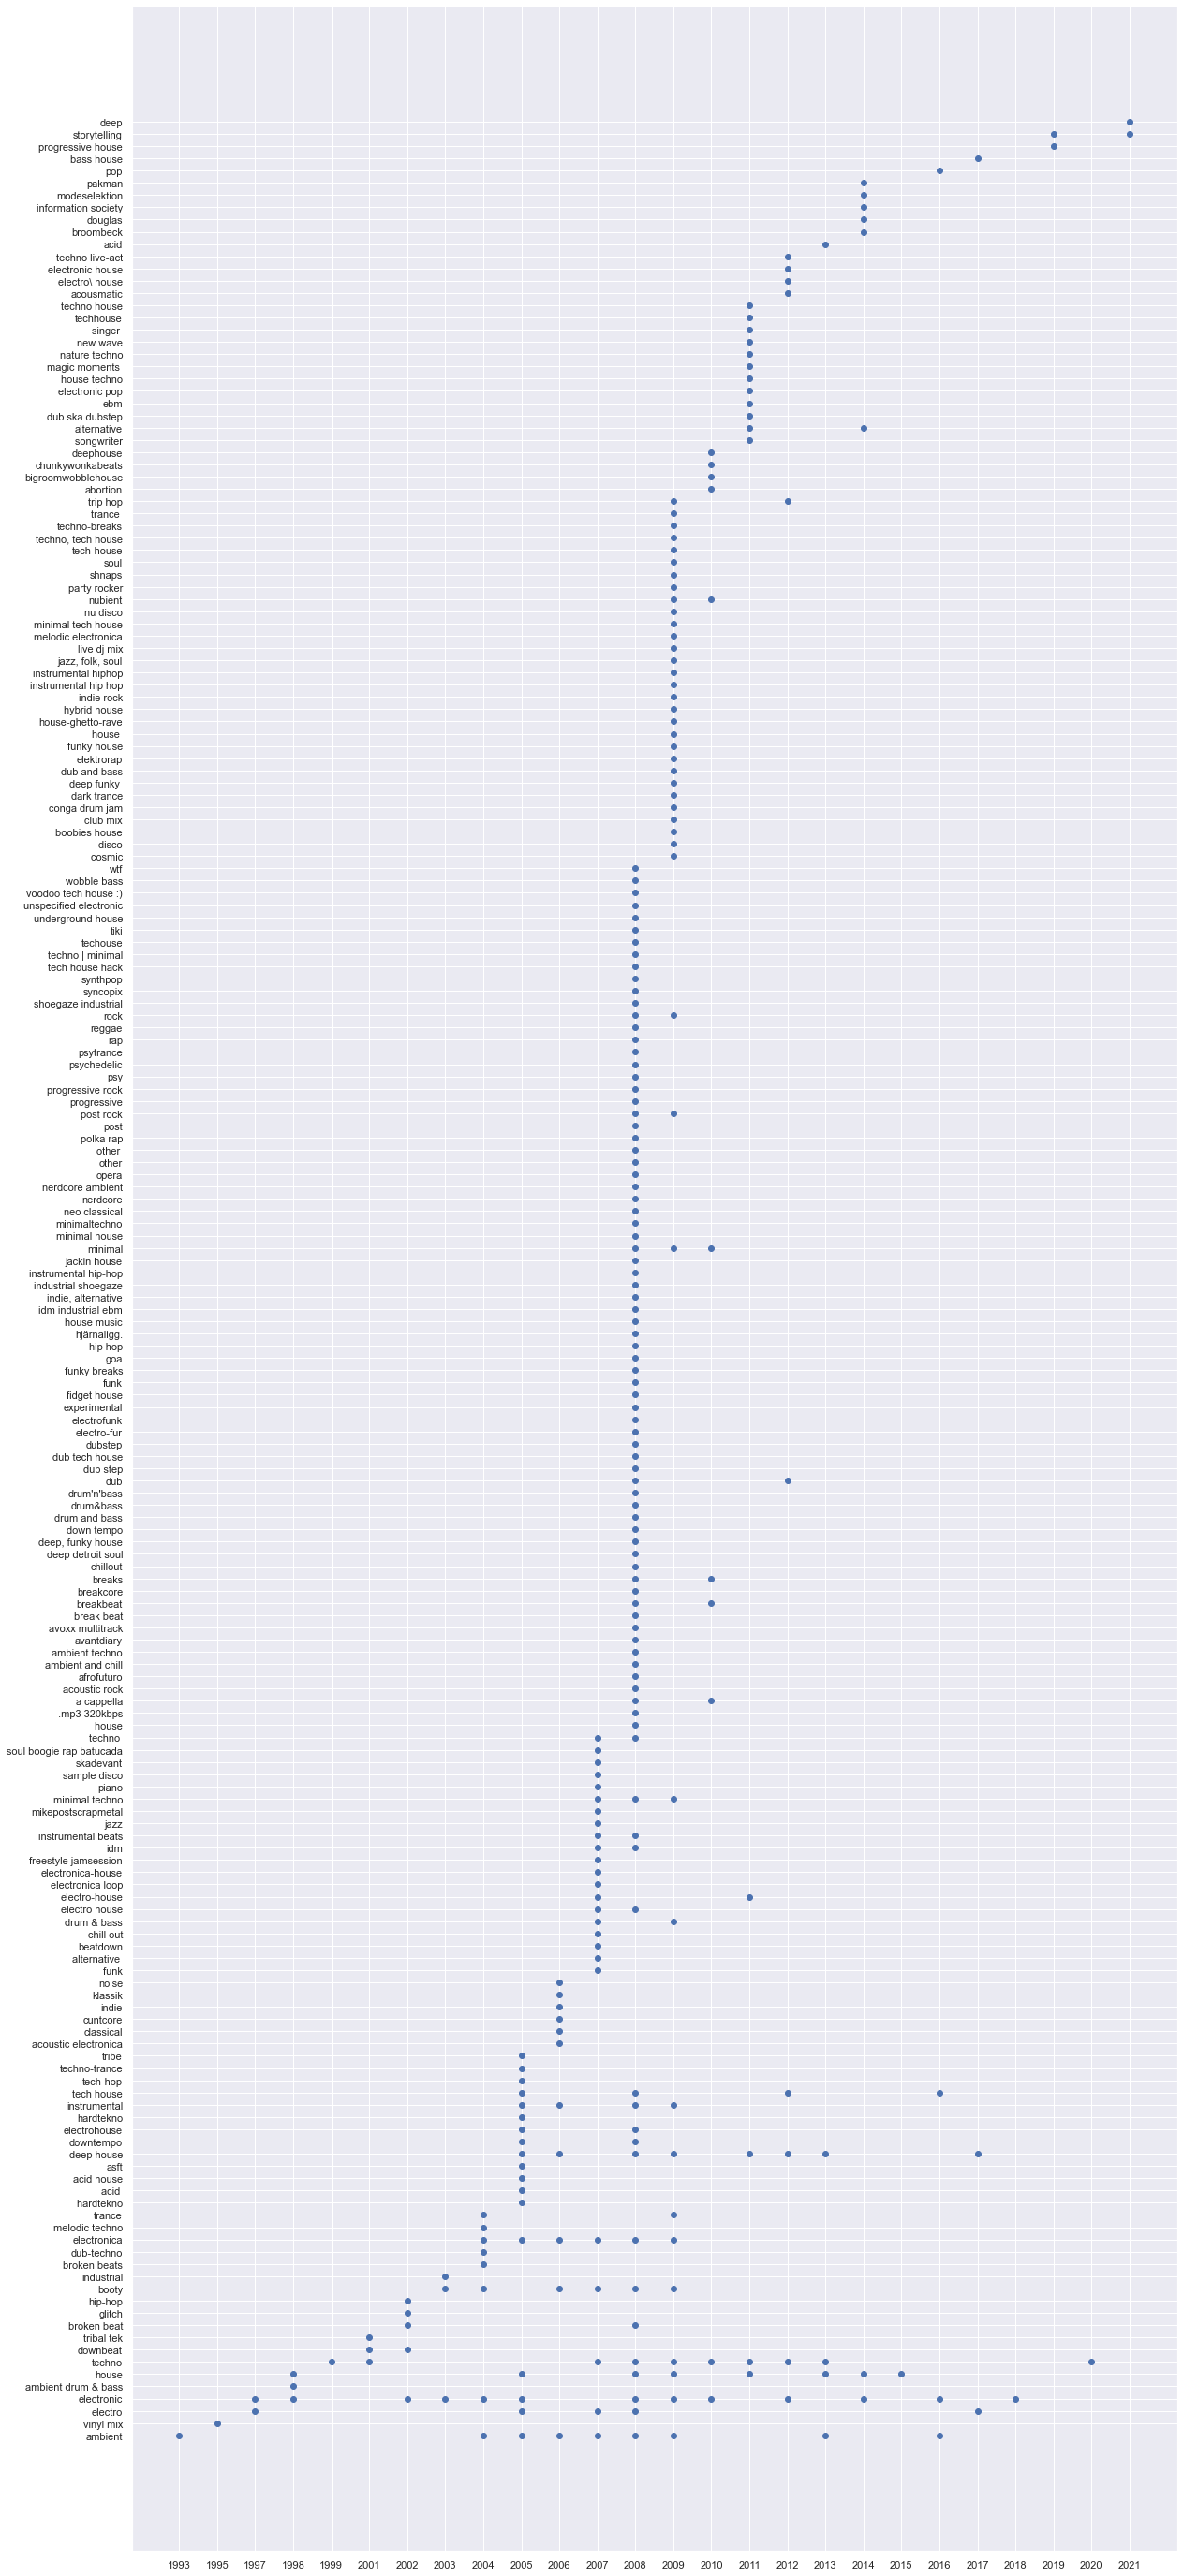

In [ ]:
plt.figure(figsize=(20,50))
plt.scatter(res['Year'],res['Genre'])

**Kết luận:**

Dòng nhạc qua các năm rất phong phú và không ngừng phát triển, trong dó có thể thấy các dòng nhạc điện tử ngày càng được ưa chuộng.